In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [41]:
#This will use label A
DI_110nm = np.loadtxt('110nm_DI.txt',delimiter = ',');
DI_110nm_2 = np.loadtxt('110nm_DI_2.txt',delimiter = ',');

#Label B
DI_153um = np.loadtxt('153um_DI.txt',delimiter = ',');

#Label C
Glycerol20_DI80_110nm = np.loadtxt('110nm_80DI_20Glycerol.txt',delimiter = ',');
Glycerol20_DI80_110nm_2 = np.loadtxt('110nm_80DI_20Glycerol_2.txt',delimiter = ',');

#Label D
DI_110nm_153um = np.loadtxt('110nm_153um_DI.txt',delimiter = ',');

# DI water with 0.11$\mu$m beads

In [42]:
ACorr = np.array([DI_110nm[i][0] for i in np.arange(0,len(DI_110nm))])
ATime = np.array([DI_110nm[i][1] for i in np.arange(0,len(DI_110nm))])

ACorr2 = np.array([DI_110nm_2[i][0] for i in np.arange(0,len(DI_110nm_2))])
ATime2 = np.array([DI_110nm_2[i][1] for i in np.arange(0,len(DI_110nm_2))])

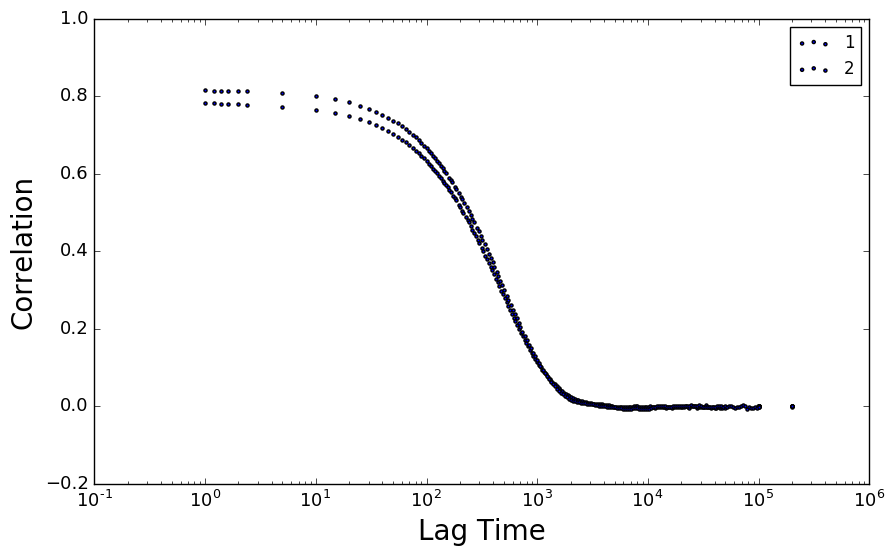

In [43]:
plt.figure(figsize=(10,6));

plt.scatter(ATime,ACorr,marker='.',label='1');
plt.scatter(ATime2,ACorr2,marker='.',label='2');
plt.xscale('log');

plt.legend(loc='best');

plt.xlabel('Lag Time',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

#plt.savefig('Sample')

# DI water with 153$\mu$m  beads

In [44]:
BCorr = np.array([DI_153um[i][0] for i in np.arange(0,len(DI_153um))])
BTime = np.array([DI_153um[i][1] for i in np.arange(0,len(DI_153um))])

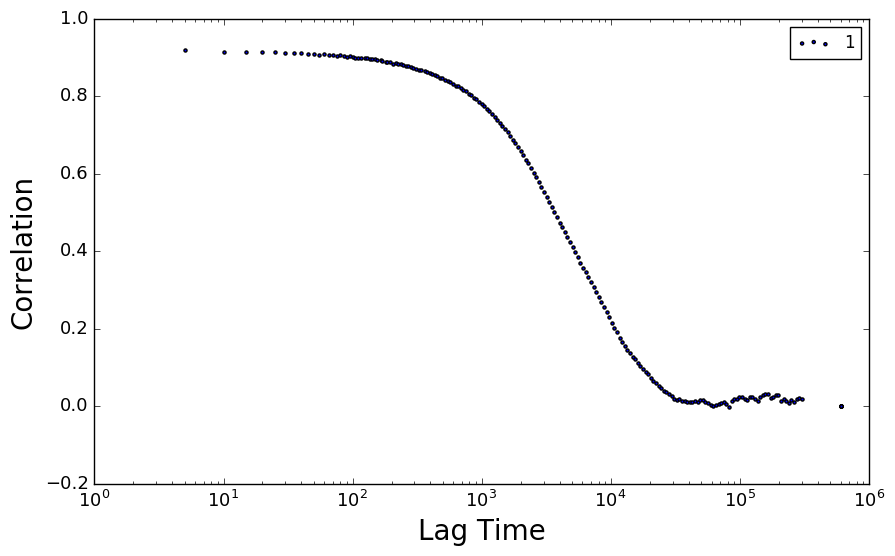

In [45]:
plt.figure(figsize=(10,6));

plt.scatter(BTime,BCorr,marker='.',label='1');
plt.xscale('log');

plt.legend(loc='best');

plt.xlabel('Lag Time',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

#plt.savefig('Sample')

# 20$\%$ glycerol by wt., 80$\%$ DI water, with 0.11$\mu$m beads

In [46]:
CCorr = np.array([Glycerol20_DI80_110nm[i][0] for i in np.arange(0,len(Glycerol20_DI80_110nm))])
CTime = np.array([Glycerol20_DI80_110nm[i][1] for i in np.arange(0,len(Glycerol20_DI80_110nm))])

CCorr2 = np.array([Glycerol20_DI80_110nm_2[i][0] for i in np.arange(0,len(Glycerol20_DI80_110nm_2))])
CTime2 = np.array([Glycerol20_DI80_110nm_2[i][1] for i in np.arange(0,len(Glycerol20_DI80_110nm_2))])

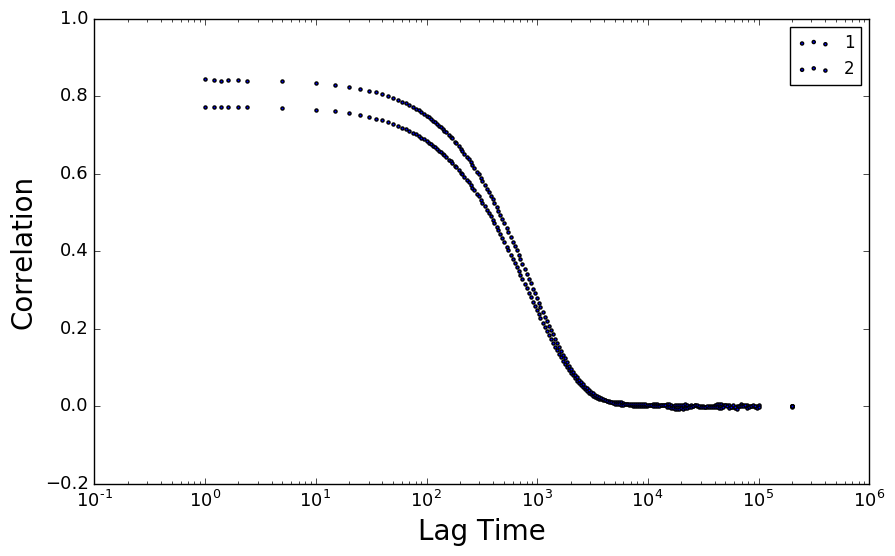

In [47]:
plt.figure(figsize=(10,6));

plt.scatter(CTime,CCorr,marker='.',label='1');
plt.scatter(CTime2,CCorr2,marker='.',label='2');
plt.xscale('log');

plt.legend(loc='best');

plt.xlabel('Lag Time',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

#plt.savefig('Sample')

# DI water with 0.11$\mu$m and 153$\mu$m  beads

In [48]:
DCorr = np.array([DI_110nm_153um[i][0] for i in np.arange(0,len(DI_110nm_153um))])
DTime = np.array([DI_110nm_153um[i][1] for i in np.arange(0,len(DI_110nm_153um))])

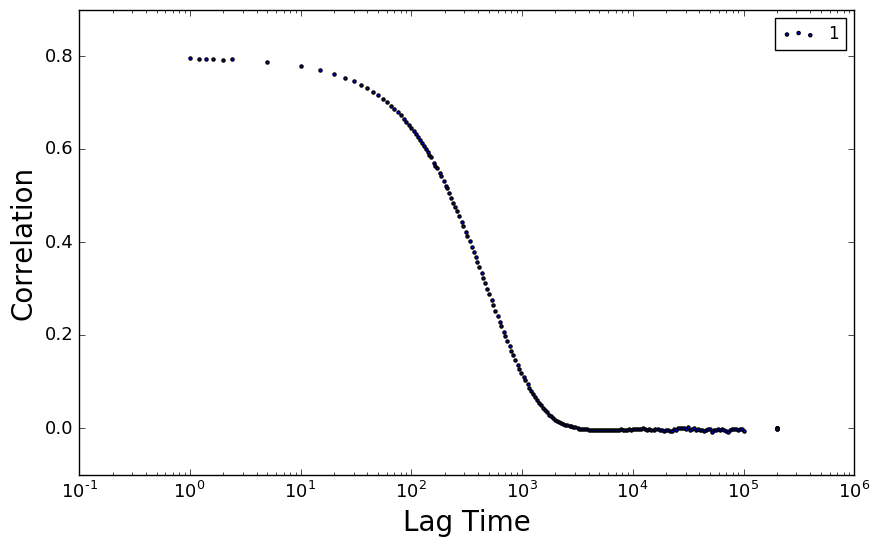

In [49]:
plt.figure(figsize=(10,6));

plt.scatter(DTime,DCorr,marker='.',label='1');
plt.xscale('log');

plt.legend(loc='best');

plt.xlabel('Lag Time',fontsize=20);
plt.ylabel('Correlation',fontsize = 20);

plt.xticks(size = 13);
plt.yticks(size = 13);

#plt.savefig('Sample')